# Model Evaluation
## Introduction

This notebook is using a simple dataset for epitope prediction used in vaccine development from the Kaggle COVID-19/SARS B-cell Epitope Prediction data which cloned on a Github repository for the sake of this project. This notebook will go through the following steps:
1. Load Training set
2. Evaluate the MLP Classifier model using AUC and Confusion Matrix

## Setup

In [1]:
## Environment libraries
import os, types
import ibm_boto3
from botocore.client import Config
import warnings

## Data processing libraries
import numpy as np
import pandas as pd

## Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Machine learning classifier and tools
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV

## Performance metric libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.exceptions import ConvergenceWarning
from sklearn import metrics
from sklearn import model_selection

In [2]:
# Handle warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module", "always" or "once"

## Load Training Data

In [4]:
# The code was removed by Watson Studio for sharing.

## Model Training and Evaluation

In [5]:
# Create variable and target training and testing arrays
X = df.drop(['target'], axis = 1).to_numpy()
y = df['target'].to_numpy()

In [6]:
# Instantiate the machine learning classifiers
mlp = MLPClassifier(hidden_layer_sizes=(50, 100, 50), max_iter=1000, alpha=1e-4, solver='lbfgs', random_state=42, learning_rate_init=.1)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=0)

In [8]:
# Train model
mlp.fit(X_train,y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))

Training set score: 0.840809


In [9]:
# Evaluate Functions

## Visual Evaluation Function
def visual_evaluation(model,gradient_booster=False):        
    fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
    plt.plot(fpr,tpr,linestyle='--')
    plt.show()

## Text Evaluation Function
def text_evaluation(model):
    print(classification_report(y_test,model.predict(X_test)))
    print("Accuracy: " + str(accuracy_score(y_test,model.predict(X_test))))
    print('AUC Score: ' + str(roc_auc_score(y_test,model.predict(X_test))))

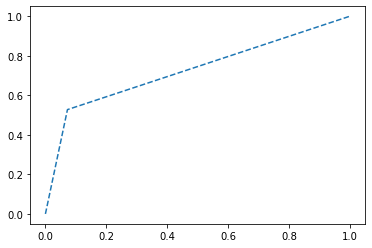

In [10]:
# Visual evaluation
visual_evaluation(mlp,gradient_booster=False)

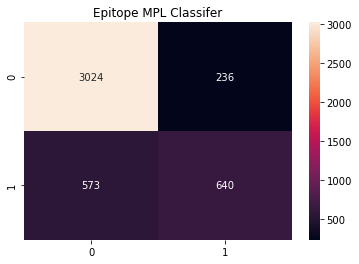

In [11]:
# Confusion Matrix
y_pred = mlp.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True,  fmt='');
title = 'Epitope MPL Classifer'
plt.title(title);

In [195]:
# Evaluation
text_evaluation(mlp)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3260
           1       0.72      0.53      0.61      1213

    accuracy                           0.82      4473
   macro avg       0.78      0.72      0.74      4473
weighted avg       0.81      0.82      0.81      4473

Accuracy: 0.8160071540353231
AUC Score: 0.7249475265401909
